<a href="https://colab.research.google.com/github/raju1207/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
Netflix_Data = pd.read_csv('Netflix Data Analysis.csv')

In [4]:
Netflix_Data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
Netflix_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Q-1: What is the trend of content addition to Netflix by year and content type?

type,Movie,TV Show
year_added,,
2017.0,839.0,325.0
2018.0,1237.0,388.0
2019.0,1424.0,575.0
2020.0,1284.0,594.0
2021.0,993.0,505.0


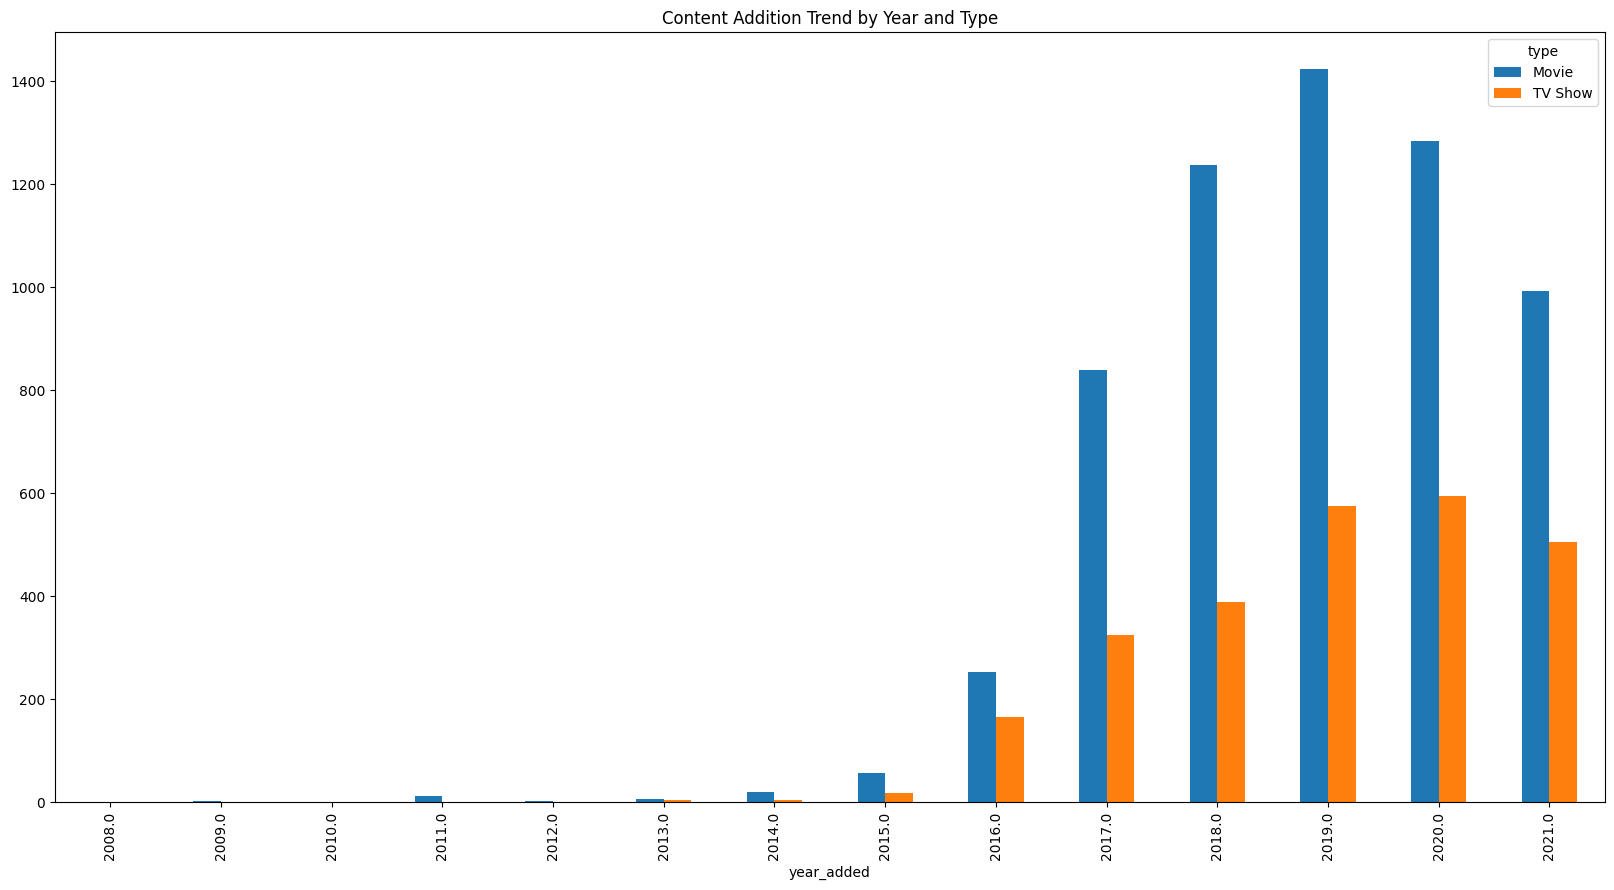

In [8]:
# Extract the year from 'date_added'
Netflix_Data['year_added'] = pd.to_datetime(Netflix_Data['date_added'], errors='coerce').dt.year

# Group by 'year_added' and 'type'
content_trend = Netflix_Data.groupby(['year_added', 'type']).size().unstack()

content_trend.plot(kind='bar', figsize=(20, 10), title="Content Addition Trend by Year and Type")
content_trend.tail()  # Show recent years

In [9]:
# Q-2: Which genres are most dominant across different content types?

In [10]:
# Split 'listed_in' into individual genres
Netflix_Data['genres'] = Netflix_Data['listed_in'].str.split(',')

# Create a new DataFrame for genre frequencies by type
from collections import Counter

def genre_counter(df, content_type):
    genres = df[df['type'] == content_type]['genres'].dropna().sum()
    return Counter(genres)

movie_genres = genre_counter(Netflix_Data, 'Movie')
tv_show_genres = genre_counter(Netflix_Data, 'TV Show')

pd.DataFrame([movie_genres, tv_show_genres], index=['Movies', 'TV Shows']).T.sort_values(by='Movies', ascending=False).head()


,Movies,TV Shows
International Movies,2624.0,NaN
Dramas,1600.0,NaN
Comedies,1210.0,NaN
Action & Adventure,859.0,NaN
Documentaries,829.0,NaN


In [ ]:
# Q-3: How does the duration of movies differ across regions, and are there trends for longer/shorter films?

In [ ]:
# Filter for Movies and extract numeric duration
movies = Netflix_Data[Netflix_Data['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Group by country and calculate average duration
avg_duration_by_country = movies.groupby('country')['duration_minutes'].mean().sort_values(ascending=False)

avg_duration_by_country.head(10)  # Top 10 countries with longest movies


<ipython-input-8-cbf6d4a70c64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)


,duration_minutes
country,
"United Kingdom, United States, Japan",208.0
"United States, United Kingdom, Morocco",205.0
"United States, Italy, United Kingdom, Liechtenstein",200.0
"New Zealand, United States",190.0
"Romania, France, Switzerland, Germany",186.0
"France, Belgium, Spain",180.0
"Germany, United States, Hong Kong, Singapore",172.0
"India, Soviet Union",161.5
"United Kingdom, United States, Morocco",161.0


In [ ]:
# Q-4: What are the most frequent collaborations between directors and actors?

In [ ]:
# Explode the 'cast' column for pairing with directors
Netflix_Data['cast_list'] = Netflix_Data['cast'].str.split(', ')
collaborations = Netflix_Data.explode('cast_list')[['director', 'cast_list']].dropna()

# Count director-actor collaborations
collaboration_counts = collaborations.value_counts().head(10)

collaboration_counts

director           cast_list         
Rajiv Chilaka      Rajesh Kava           17
                   Julie Tejwani         17
                   Jigna Bhardwaj        17
                   Rupa Bhimani          16
                   Vatsal Dubey          15
                   Swapnil               12
                   Mousam                12
Suhas Kadav        Saurav Chakraborty     8
Toshiya Shinohara  Satsuki Yukino         7
S.S. Rajamouli     Nassar                 7
Name: count, dtype: int64

In [ ]:
# Q-5: How does content popularity (e.g., genres or directors) vary with the release year?

In [ ]:
# Group by 'release_year' and 'genres'
genre_trend = Netflix_Data.explode('genres').groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Find the most popular genre for each year
most_popular_genres = genre_trend.idxmax(axis=1)

# Analyze director popularity over time
director_trend = Netflix_Data.groupby(['release_year', 'director']).size().unstack(fill_value=0).sum(axis=0).sort_values(ascending=False).head(10)

most_popular_genres.head(), director_trend


(release_year
 1925          TV Shows
 1942     Documentaries
 1943     Documentaries
 1944     Documentaries
 1945     Documentaries
 dtype: object,
 director
 Rajiv Chilaka             19
 Raúl Campos, Jan Suter    18
 Suhas Kadav               16
 Marcus Raboy              16
 Jay Karas                 14
 Cathy Garcia-Molina       13
 Jay Chapman               12
 Youssef Chahine           12
 Martin Scorsese           12
 Steven Spielberg          11
 dtype: int64)